![Spotify](Spotify.png)
# <center>Spotify Top Hits  (2000-2019) | Exploratory Data Analysis</center>

# Introduction<br>
This notebook presents an **Exploratory Data Analysis** of the dataset <a href= "https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019"> Top Hits Spotify from 2000-2019</a> posted on Kaggle by user Mark Koverha.

# Importing packages

In [1]:
import pandas as pd, numpy as np, plotly.express as px, seaborn as sns, matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.io as pio
sns.set_palette("deep")
sns.set_style("darkgrid")
pio.renderers.default = "svg"

# Importing data 

In [2]:
df = pd.read_csv('spotify.csv')
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


# Understanding the dataset<br>
The dataset is composed of 2000 rows and 18 columns. So, *a priori* we can say that this dataset contains the **Top 2000** songs from the period analyzed. <br>
In order to increase the depth of understanding of the data that we have, we must understand the content of each column present in the dataset. The description of the columns are as follows :<br>
- **artist:** Name of the artist.<br><br>
- **song:** Name of the track.<br><br>
- **duration_ms:** Duration of the track in milliseconds.<br><br>
- **explicit:** Whether or not the content of a song is offensive or inappropriate for children.<br><br>
- **year:** Year of release of the track.<br><br>
- **popularity:** The higher the value the more popular the song is.<br><br>
- **danceability:** Describes how suitable the track is for dancing based on tempo, rythm stability, beat strength, and others, where a value closer to 0.0 indicates lower danceability and a value closer to 1.0 indicates higher danceability.<br><br>
- **energy:** It represents the perceptual measure of intensity and activity going from 0.0 to 1.0<br><br>
- **key:** What key the track is in. Uses integer to represent keys where 0 = C, 1 = C♯/D♭, 2 = D, and so on. In case there's no key detected, the value is -1.<br><br>
- **loudness:** Represents the overall loudness of a track in decibels (dB) and it's the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Loudness values are averaged across the entire track, with values typically between the range of -60 and 0 dB.<br><br>
- **mode:** Indicates if the track is in a major or in a minor scale, where major = 1 and minor = 0.<br><br>
- **speechiness:** It detects the presence of spoken words in a track. The more exclusively speech-like the recording, for instance a talk show or an audiobook, the closer to 1.0 will be the attributed value. Values above 0.66 describe tracks that are mostly made entirely of spoken words, while values between 0.33 and 0.66 describe tracks that may contain both music and speech. Values below 0.33 most likely represent music and other non-speech tracks. <br><br>
- **acousticness:** A confidence measure from 0.0 to 1.0 that indicates whether a track is acoustic or not, where 1.0 represents high confidence the track **is** acoustic.<br><br>
- **instumentalness:** Predicts if the track contains vocals or not. The closer its value is to 1.0, the greater likelihood the track contains no vocals. Any value above 0.5 is intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. "Ohh"s and "aah"s are treated as instrumental in this context.<br><br>
- **liveness:** Detects the presence of an audience in the recording. A value above 0.8 indicates higher probability that the track was performed live.<br><br>
- **valence:** A measure from 0.0 to 1.0 that describes the positiveness conveyed by the track. Tracks with higher valence may trigger positive emotions, such as happiness, cheerfulness and euphoria, while tracks with lower valence may trigger negative emotions, such as sadness, depression and anger.<br><br>
- **tempo:** Tempo in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.<br><br>
- **genre:** Genre of the track.

## Checking if there is any null value in the dataset

In [3]:
df.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

**Great!** Apparently there is no missing data in the dataset that we will have to deal with!

# Checking years of release present in the dataset

In [4]:
df.year.unique()

array([2000, 1999, 2001, 2011, 2002, 2016, 1998, 2018, 2004, 2010, 2015,
       2006, 2008, 2019, 2003, 2013, 2005, 2012, 2020, 2007, 2009, 2017,
       2014], dtype=int64)

Even though the dataset's title says that it contains hits from 2000 to 2019, we can see that some tracks have it's year of release dated from 1998, 1999 and 2020. Let's see how many tracks were released in those three years and what tracks they are.

In [5]:
# Printing how many songs released in 1998, 1999 and 2020 are in the dataset
print(len(df.query("year == 1998")))
print(len(df.query("year == 1999")))
print(len(df.query("year == 2020")))

1
38
3


We have 1 song from 1998, 38 songs from 1999 and 3 songs from 2020.<br>
Considering that the goal of this study is to analyze the top songs from the year 2000 up until the year 2019, we will drop from the dataframe all data from songs released in any year that is outside the period intended to be analyzed.

In [6]:
# Storing all songs released before the year 2000 and after the year 2019 into a new dataframe
df_years_drop = df[(df['year'] <2000) | (df['year'] > 2019)].index
# Removing songs from 1998, 1999 and 2020 from the original dataframe
df = df.drop(df_years_drop)
# Checking once again the values of the years now in the dataframe
df.year.unique()

array([2000, 2001, 2011, 2002, 2016, 2018, 2004, 2010, 2015, 2006, 2008,
       2019, 2003, 2013, 2005, 2012, 2007, 2009, 2017, 2014], dtype=int64)

In [7]:
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,hip hop
7,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.0267,0.000000,0.4670,0.861,103.035,"pop, rock"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


Now we can know for sure that we're going to analyze Spotify's Top 1958 songs from the year 2000-2019.

# Converting milliseconds to seconds and minutes:seconds

In [8]:
# Creating a function that converts milliseconds to minutes and seconds
def ms_to_min_sec(ms):
    sec = ms/1000
    return f"{int(sec//60)}:{int(sec%60)}"

df['min:sec'] = df['duration_ms'].apply(ms_to_min_sec)

In [9]:
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,min:sec
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,3:31
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",3:44
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,3:20
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,hip hop,4:44
7,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.0267,0.000000,0.4670,0.861,103.035,"pop, rock",4:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop,3:1
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop,2:58
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country",3:20
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop,2:51


# Number of songs per year

In [10]:
# Organizing the number of songs released per year
songs_per_year = (df.year.value_counts().rename_axis('year').reset_index(name = 'songs'))
songs_per_year

,year,songs
0,2012,115
1,2017,111
2,2001,108
3,2018,107
4,2010,107
5,2014,104
6,2005,104
7,2011,99
8,2016,99
9,2015,99


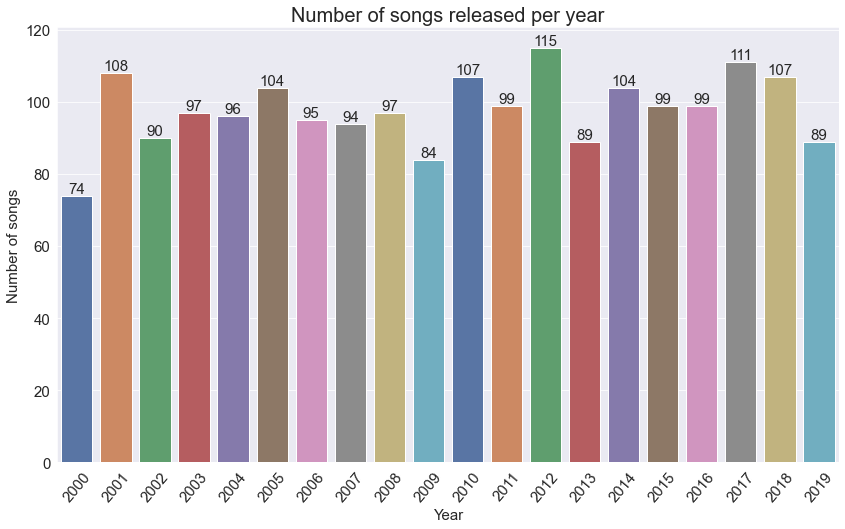

In [11]:
# Plotting songs_per_year in a bar chart
plt.figure(figsize=(14,8))
ax = sns.barplot(x = 'year', y = 'songs', data = songs_per_year,palette='deep')
plt.ylabel('Number of songs', size = 15)
plt.xlabel('Year', size = 15)
plt.title('Number of songs released per year', size = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation = 50)
ax.bar_label(ax.containers[0],size = 15)
plt.show()


Analyzing the top hits from 2000 to 2019, it's possible to see that 2012 had the highest releases to make it to the top hits, 115 songs, while 2000 was the year with the lowest number of releases to make it to the top hits, being only 74 songs.

# Explicit content

In [12]:
# Creating a dataframe to order songs by explicit and not explicit
explicit_or_not_explicit = pd.DataFrame(df.explicit.value_counts().rename_axis(
    'explicit').reset_index(name='songs'))
explicit_or_not_explicit

,explicit,songs
0,False,1418
1,True,540


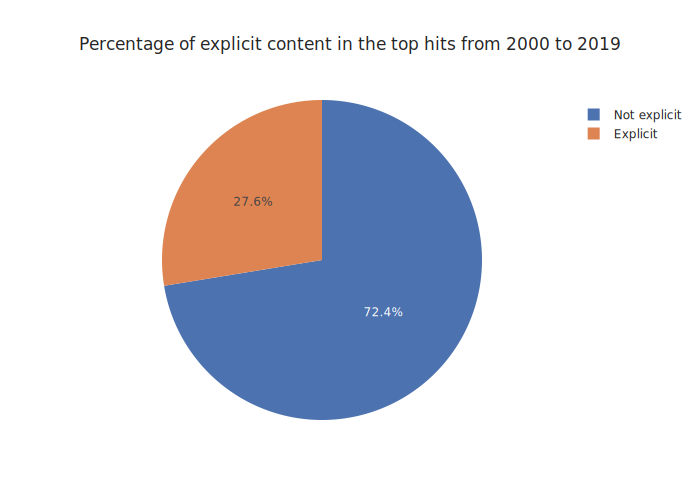

In [13]:
fig = px.pie(explicit_or_not_explicit, names = ['Not explicit','Explicit'], 
             values = 'songs', template='seaborn',
            title = 'Percentage of explicit content in the top hits from 2000 to 2019')
fig.show()

It's possible to realize that 72.4% of the top hits from 2000 to 2019 is made up of songs that are classified as being **not explicit**, which means that they don't contain lyrics considered to be offensive or inappropriate for children.

# Key and mode

In [14]:
# Creating a dataframe to organize songs per key and mode
key_mode = df.groupby(['key','mode']).size().unstack(fill_value = 0).reset_index()
# Renaming columns 0 to minor and 1 to major
key_mode.rename(columns = {0: 'minor', 1: 'major'}, inplace = True)
# Organizing key names
key_mode.key.replace({0:'C',
1:'C♯/D♭',
2:'D',
3:'E♭/D♯',
4:'E',
5:'F',
6:'F♯/G♭',
7:'G',
8:'A♭/G♯',
9:'A',
10:'B♭/A♯',
11:'B'}, inplace=True)
# Creating a column containing the total number of songs
key_mode['songs'] = key_mode['minor'] + key_mode['major']

# See results
key_mode

mode,key,minor,major,songs
0,C,65,128,193
1,C♯/D♭,91,168,259
2,D,32,123,155
3,E♭/D♯,31,27,58
4,E,76,48,124
5,F,111,67,178
6,F♯/G♭,79,73,152
7,G,56,139,195
8,A♭/G♯,57,112,169
9,A,71,84,155


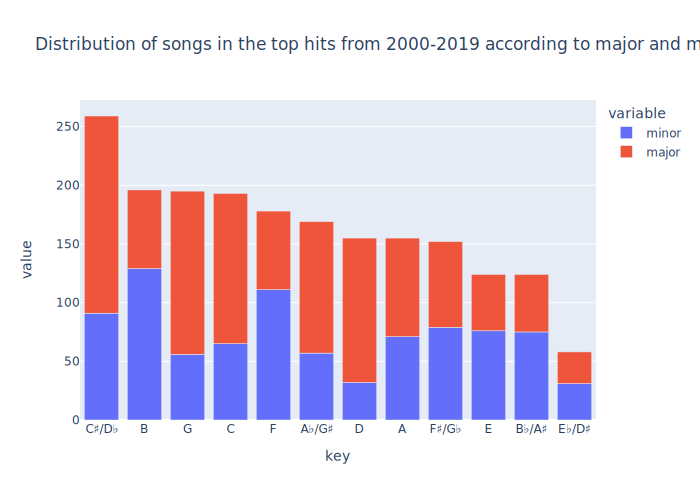

In [15]:
# Plotting bar chart showing the top hits distributed by key and mode
fig = px.bar(key_mode.sort_values('songs', ascending = False),
             x='key', y = ['minor','major'], 
             title = 'Distribution of songs in the top hits from 2000-2019 according to major and minor keys')
fig.show()

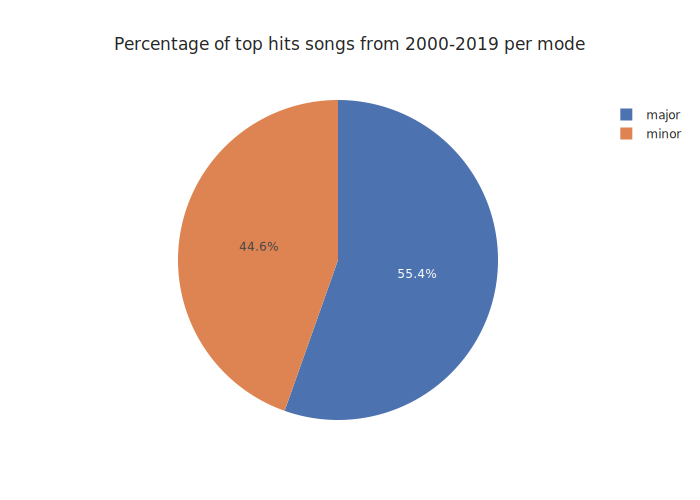

In [16]:
# Plotting pie chart containing mode distribution
fig = px.pie(df['mode'].value_counts().reset_index(), names = ['major','minor'], 
             values = 'mode', template='seaborn',
            title = 'Percentage of top hits songs from 2000-2019 per mode')
fig.show()

It's possible to realize that **C♯/D♭**	is the most popular *key* between the top hits from the period and the majority of them are on the **major scale** (55.4%).<br>
According to <a href = "https://findyourmelody.com/major-vs-minor-scales-differences/"> this article</a> you can typically tell if a piece primarily uses a major scale if it makes you feel happy while the oposite is true for the minor scale, although **not always** this kind of distinction will be true, since music may convey a range of emotions.

# Most popular artists

In [17]:
# Organizing the ten most popular artists according to popularity score
top_10_artists = df.groupby('artist')[['artist','popularity']].sum().sort_values('popularity',
                                                               ascending=False).head(10)
top_10_artists

,popularity
artist,
Rihanna,1803
Eminem,1519
Drake,1424
Calvin Harris,1356
David Guetta,1185
Britney Spears,1140
Taylor Swift,1125
Chris Brown,1080
Kanye West,1049


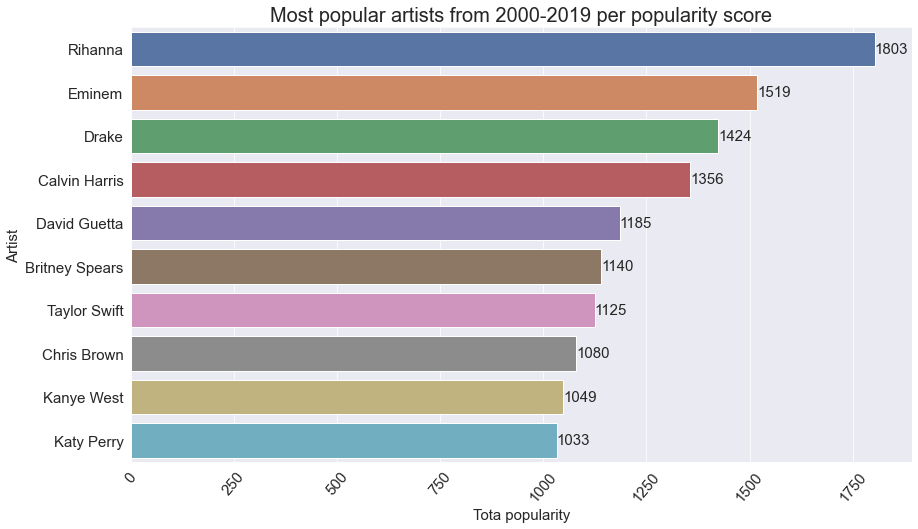

In [18]:
# Visualizing most popular artists
plt.figure(figsize=(14,8))
ax = sns.barplot(data = top_10_artists, x = 'popularity', y = top_10_artists.index ,palette='deep')
plt.ylabel('Artist', size = 15)
plt.xlabel('Tota popularity', size = 15)
plt.title('Most popular artists from 2000-2019 per popularity score', size = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation = 50)
ax.bar_label(ax.containers[0],size = 15)
plt.show()

# Average song duration over the year

In [19]:
# Organizing a dataframe with the average duration of the top hits from the analyzed period
average_duration = df[['duration_ms','year']].groupby('year').mean().reset_index()
average_duration['min:sec'] =average_duration['duration_ms'].apply(ms_to_min_sec)
average_duration[['year','min:sec']]

,year,min:sec
0,2000,4:9
1,2001,4:2
2,2002,4:13
3,2003,3:56
4,2004,3:54
5,2005,3:56
6,2006,3:58
7,2007,3:51
8,2008,3:55
9,2009,3:56


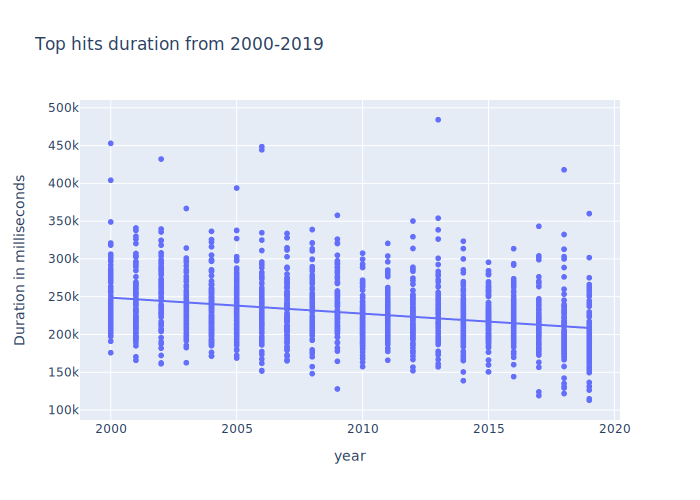

In [20]:
# Visualizing top hits duration and a linear regression model
fig = px.scatter(df, x='year', y='duration_ms', trendline='ols',
                 labels = {'duration_ms' : 'Duration in milliseconds'},
                title = 'Top hits duration from 2000-2019')
fig.show()

According to the scatter graph above and its **trendline**, it is possible to notice that the average duration has been **decreasing** over time.<br>
Back in 2003, the top hits had an average duration of 3:56m, while in 2019 the average was 3:16m, showing that hits are getting shorter since 2000.

# Distributions across Top Hits from 2000-2019

### Danceability distribution

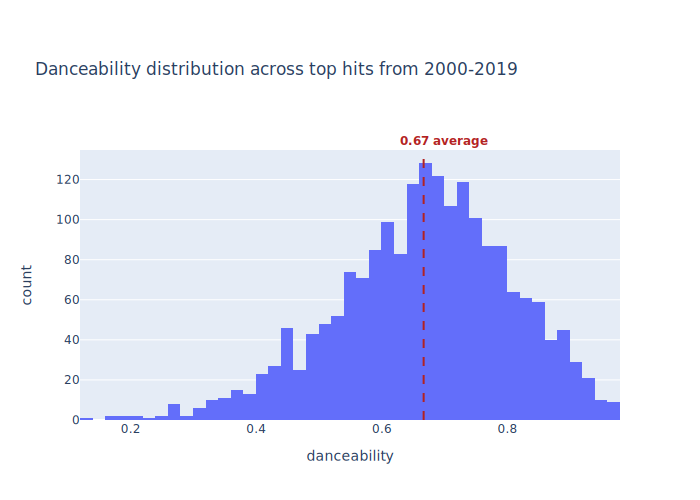

In [21]:
fig = px.histogram(df,x = 'danceability',
                   title = 'Danceability distribution across top hits from 2000-2019',)
fig.add_vline(x=np.mean(df.danceability),line_width = 2, line_dash = 'dash', 
              line_color = 'firebrick')
fig.update_layout(margin=dict(t=150))
fig.add_annotation(dict(font=dict(color="firebrick",size=12),
                            x=0.70,
                            y=1.07,
                            showarrow=False,
                            text='<b>0.67 average</b>',
                            textangle=0,
                            xref="x",
                            yref="paper"
                           ))
fig.show()

### Energy distribution

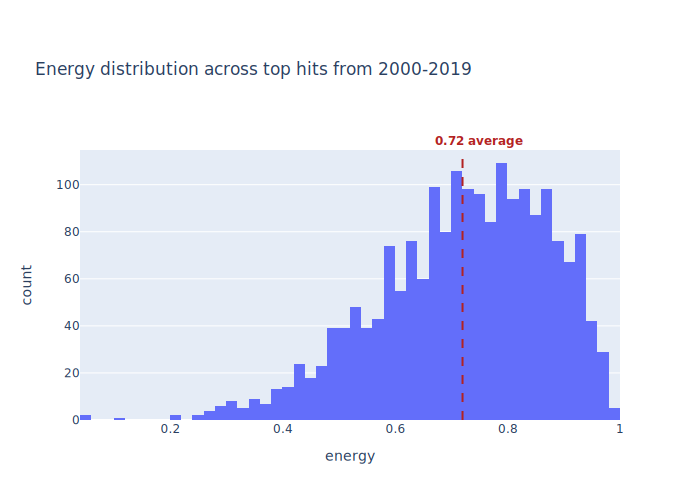

In [22]:
fig = px.histogram(df,x = 'energy',
                   title = 'Energy distribution across top hits from 2000-2019',)
fig.add_vline(x=np.mean(df.energy),line_width = 2, line_dash = 'dash', 
              line_color = 'firebrick')
fig.update_layout(margin=dict(t=150))
fig.add_annotation(dict(font=dict(color="firebrick",size=12),
                            x=0.75,
                            y=1.07,
                            showarrow=False,
                            text='<b>0.72 average</b>',
                            textangle=0,
                            xref="x",
                            yref="paper"
                           ))
fig.show()

### Speechiness distribution

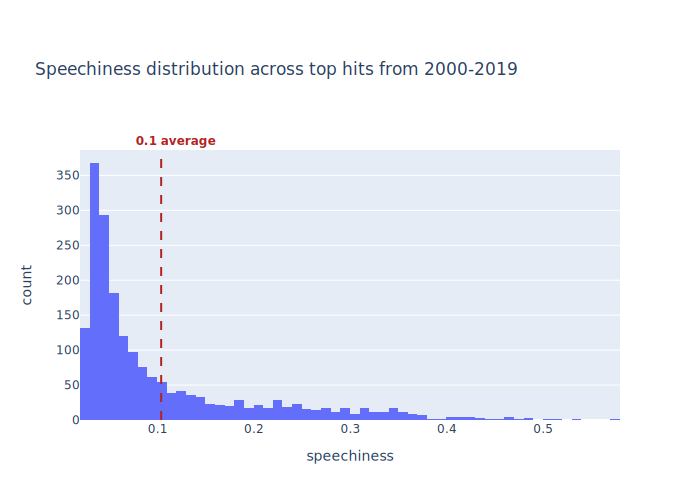

In [23]:
fig = px.histogram(df,x = 'speechiness',
                   title = 'Speechiness distribution across top hits from 2000-2019',)
fig.add_vline(x=np.mean(df.speechiness),line_width = 2, line_dash = 'dash', 
              line_color = 'firebrick')
fig.update_layout(margin=dict(t=150))
fig.add_annotation(dict(font=dict(color="firebrick",size=12),
                            x=0.12,
                            y=1.07,
                            showarrow=False,
                            text='<b>0.1 average</b>',
                            textangle=0,
                            xref="x",
                            yref="paper"
                           ))
fig.show()

### Acousticness distribution

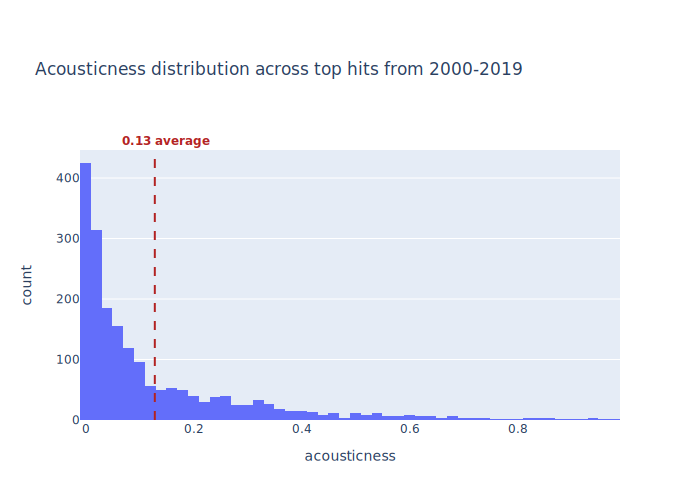

In [24]:
fig = px.histogram(df,x = 'acousticness',
                   title = 'Acousticness distribution across top hits from 2000-2019',)
fig.add_vline(x=np.mean(df.acousticness),line_width = 2, line_dash = 'dash', 
              line_color = 'firebrick')
fig.update_layout(margin=dict(t=150))
fig.add_annotation(dict(font=dict(color="firebrick",size=12),
                            x=0.15,
                            y=1.07,
                            showarrow=False,
                            text='<b>0.13 average</b>',
                            textangle=0,
                            xref="x",
                            yref="paper"
                           ))
fig.show()

### Instrumentalness distribution

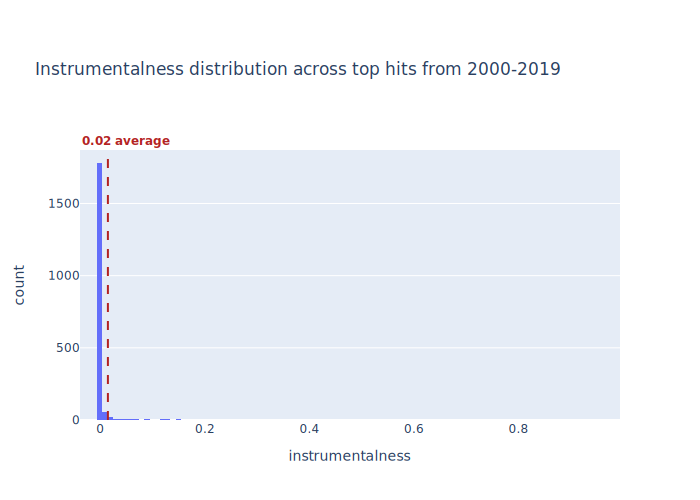

In [25]:
fig = px.histogram(df,x = 'instrumentalness',
                   title = 'Instrumentalness distribution across top hits from 2000-2019',)
fig.add_vline(x=np.mean(df.instrumentalness),line_width = 2, line_dash = 'dash', 
              line_color = 'firebrick')
fig.update_layout(margin=dict(t=150))
fig.add_annotation(dict(font=dict(color="firebrick",size=12),
                            x=0.05,
                            y=1.07,
                            showarrow=False,
                            text='<b>0.02 average</b>',
                            textangle=0,
                            xref="x",
                            yref="paper"
                           ))
fig.show()

### Liveness distribution

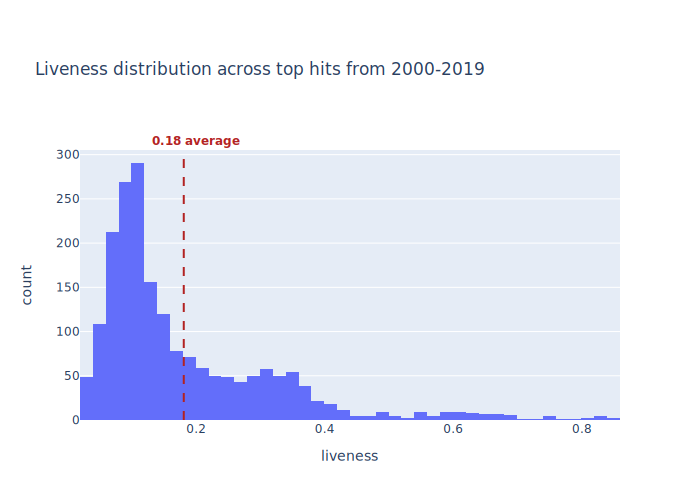

In [26]:
fig = px.histogram(df,x = 'liveness',
                   title = 'Liveness distribution across top hits from 2000-2019',)
fig.add_vline(x=np.mean(df.liveness),line_width = 2, line_dash = 'dash', 
              line_color = 'firebrick')
fig.update_layout(margin=dict(t=150))
fig.add_annotation(dict(font=dict(color="firebrick",size=12),
                            x=0.20,
                            y=1.07,
                            showarrow=False,
                            text='<b>0.18 average</b>',
                            textangle=0,
                            xref="x",
                            yref="paper"
                           ))
fig.show()

### Valence distribution

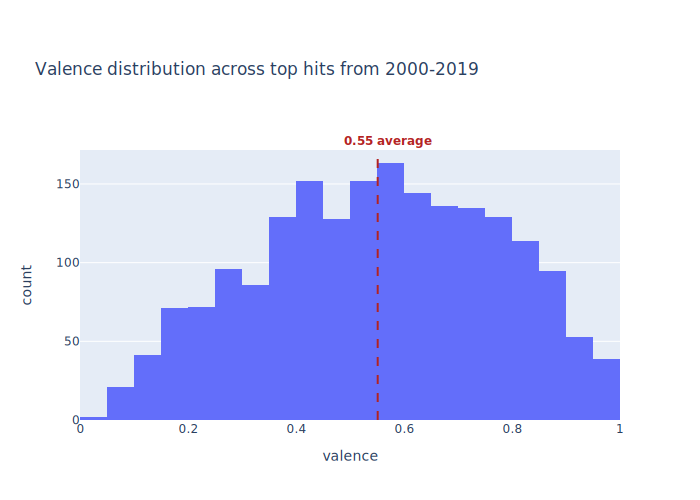

In [27]:
fig = px.histogram(df,x = 'valence',
                   title = 'Valence distribution across top hits from 2000-2019',)
fig.add_vline(x=np.mean(df.valence),line_width = 2, line_dash = 'dash', 
              line_color = 'firebrick')
fig.update_layout(margin=dict(t=150))
fig.add_annotation(dict(font=dict(color="firebrick",size=12),
                            x=0.57,
                            y=1.07,
                            showarrow=False,
                            text='<b>0.55 average</b>',
                            textangle=0,
                            xref="x",
                            yref="paper"
                           ))
fig.show()

### Tempo distribution

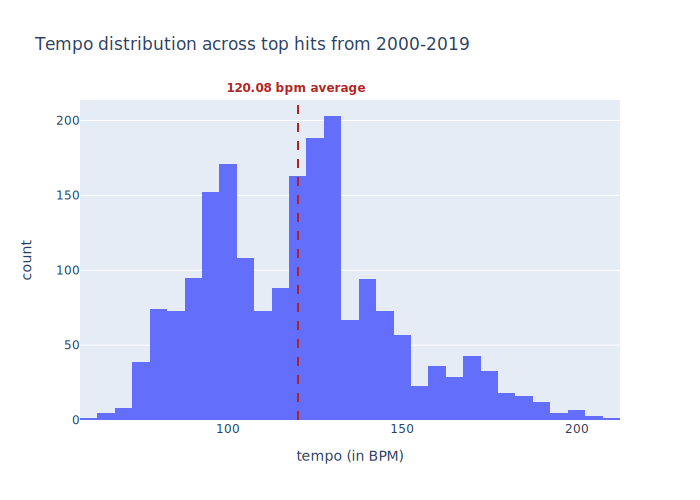

In [28]:
fig = px.histogram(df,x = 'tempo',
                   title = 'Tempo distribution across top hits from 2000-2019',
                  labels = {'tempo' : 'tempo (in BPM)'})
fig.add_vline(x=np.mean(df.tempo),line_width = 2, line_dash = 'dash', 
              line_color = 'firebrick')
fig.update_layout(margin_autoexpand=True)
fig.add_annotation(dict(font=dict(color="firebrick",size=12),
                            x=0.40,
                            y=1.07,
                            showarrow=False,
                            text='<b>120.08 bpm average</b>',
                            textangle=0,
                            xref= 'paper',
                            yref="paper"
                           ))
fig.show()

### Loudness distribution

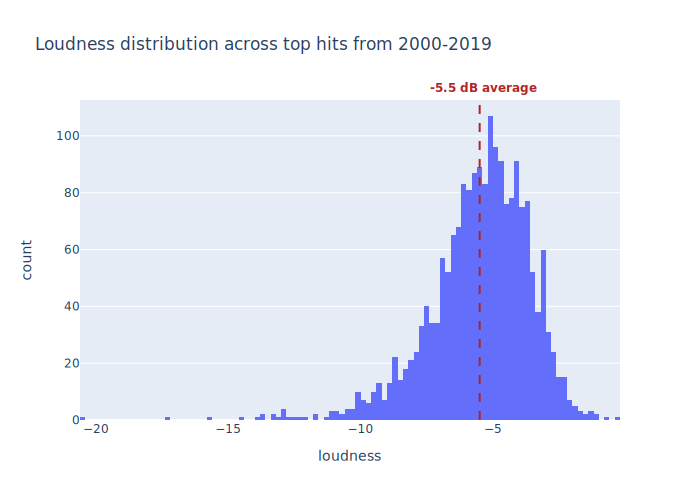

In [29]:
fig = px.histogram(df,x = 'loudness',
                   title = 'Loudness distribution across top hits from 2000-2019')
fig.add_vline(x=np.mean(df.loudness),line_width = 2, line_dash = 'dash', 
              line_color = 'firebrick')
fig.update_layout(margin_autoexpand=True)
fig.add_annotation(dict(font=dict(color="firebrick",size=12),
                            x=0.85,
                            y=1.07,
                            showarrow=False,
                            text='<b>-5.5 dB average</b>',
                            textangle=0,
                            xref="paper",
                            yref="paper"
                           ))
fig.show()

When we analyze the distribution of different characteristics of the top hits from 2000-2019, it is possible to notice that they have a lot in common.<br>
On average, they tend to score high on **danceability** and **energy**, which means that most of these songs show a lot of intensity and a high suitability for dancing, probably good songs for clubs and parties.<br>
The average tempo is 120.08 BPM, which according to this <a href ="https://blog.storyblocks.com/tutorials/what-are-beats-per-minute-bpm/#:~:text=Moderato%20(moderate)%20is%20108%E2%80%93,faster%20is%20200%2B%20BPM">article</a>   falls between a moderate to a fast paced rythm.<br>
The average of valence is 0.55, considering that valence is a measure from 0.0 to 1.0, where the closer to 1.0 the more positive are the feelings conveyed by the track, it's possible to see that there's a good balance between "positive sounding" music and "negative sounding" music between the top hits from that period.<br>
Most top hits score low on **speechiness**,**liveness**, **acousticness** and **instrumentalness**, which means that most of these tracks contain vocals, although they are not mostly speech-like, they are also recorded in a studio, they are not acoustic songs and are not instrumental songs.

# Correlation between measures

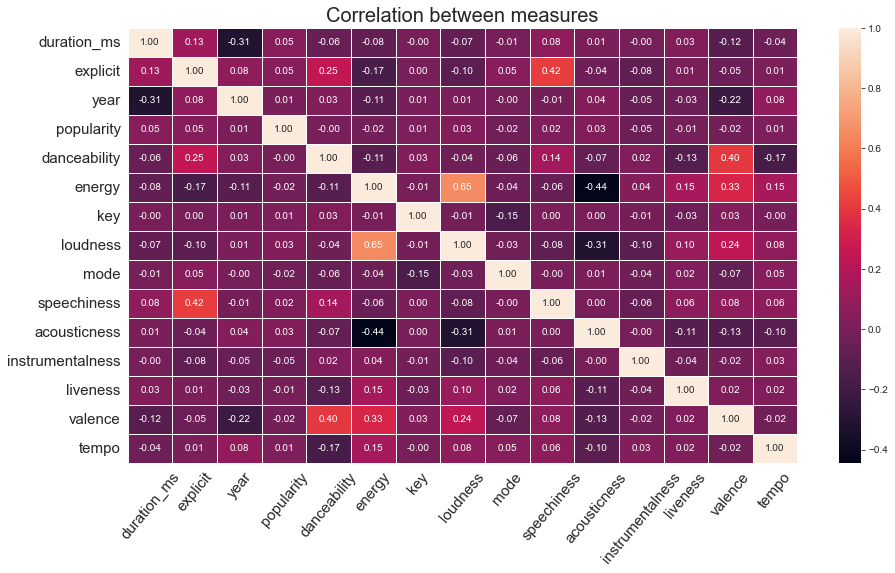

In [30]:
# Plotting a correlation heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.title('Correlation between measures', size = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation = 50)
plt.show()

Looking at the heatmap, it's possible to realize a bunch of **positive** and **negative** correlation between different measures.<br>
For instance, it's possible to see that loudness and energy have a significant positive correlation, meaning that, the louder the song, the more energy it conveys.<br>
Speechiness and explicit also have a positive correlation, which means that the more words a song has, the more likely it is to contain words that may be offensive or inappropriate for children.<br>
Energy and acousticness, on the other hand, have a very negative correlation, meaning that most acoustic songs don't convey a lot of intensity and activity to the listener.

# Genres distribution in the Top Hits from 2000-2019

In [31]:
genre_distribution = pd.DataFrame(df.genre.value_counts().rename_axis('Genre').reset_index(
    name='total'))
genre_distribution.head(10)

,Genre,total
0,pop,416
1,"hip hop, pop",275
2,"hip hop, pop, R&B",240
3,"pop, Dance/Electronic",219
4,"pop, R&B",173
5,hip hop,121
6,"hip hop, pop, Dance/Electronic",78
7,rock,57
8,"rock, pop",41
9,Dance/Electronic,40


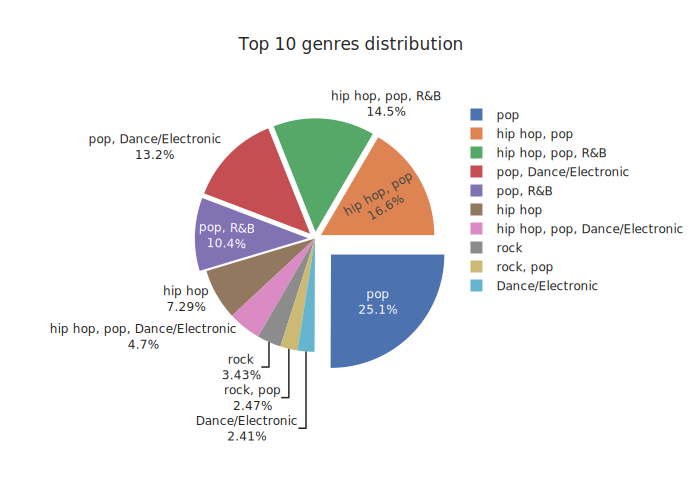

<Figure size 576x144 with 0 Axes>

In [32]:
plt.figure(figsize=(8,2))
fig = px.pie(genre_distribution.head(10), names = 'Genre',
      values = 'total', template = 'seaborn', title = 'Top 10 genres distribution')
fig.update_traces(rotation=90, pull = [0.2,0.06,0.06,0.06,0.06], textinfo = "percent+label")
fig.show()

Most top hits from 2000-2019 can be categorized as *pop*, *hip hop*, *R&B*, *Dance/Electronic* and *rock*. Among these categories, *pop* seems to be the most frequent of them, specially considering that most songs are categorized as *hip hop and pop*,*rock and pop* and *Dance/Electronic and pop*, for example.

# Conclusions<br>
- Most songs that made it to the top hits from 2000-2019 were classified as **pop**, **hip hop**, **dance/electronic** and **rock**.<br><br>
- Most songs were composed in a **major mode**, that tends to be associated with positive and cheerful emotions.<br><br>
- Most top hits didn't have lyrics whose content was perceived as explicit.<br><br>
- C♯/D♭ was the most popular key among the top hits.<br><br>
- Rihanna, Eminem and Drake were the three artists with the highest popularity score.<br><br>
- On average, the top hits had high levels of danceability and energy, a moderate to a fast paced tempo, were recorded in a studio, had vocals, were not acoustic and were not instrumental music.<br><br>
- The average duration of top hits have been **decreasing** during the last couple of decades, falling from an average of around 4 minutes in the *early 2000s* to an average of 3 minutes and 16 seconds in 2019.